In [1]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv(r"C:\Users\vidya\Topic Modelling_3020\Thematic_skillsNer.csv")

# Convert Important_Words column (comma-separated string) into a list
df["cleaned_description"] = df["cleaned_description"].astype(str).apply(lambda x: x.split(", "))

Loading dataset...


In [3]:
# Function to perform topic modeling on a given set of documents
def perform_topic_modeling(documents, num_topics=10):
    # Create a dictionary and corpus
    dictionary = corpora.Dictionary(documents)
    dictionary.filter_extremes(no_below=1, no_above=0.95)
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # Train LDA model
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42, passes=50)
    
    return lda_model, corpus, dictionary


In [4]:
# Function to calculate coherence score
def calculate_coherence_score(documents, dictionary, corpus, num_topics):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42, passes=50)
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [5]:
# Function to find the optimal number of topics and return scores for plotting
def find_optimal_topics(documents, dictionary, corpus, min_topics= 1, max_topics=20):
    coherence_scores = []
    topic_nums = range(min_topics, max_topics + 1)
    
    for num_topics in topic_nums:
        coherence_score = calculate_coherence_score(documents, dictionary, corpus, num_topics)
        coherence_scores.append(coherence_score)
        print(f"Coherence score for {num_topics} topics: {coherence_score:.4f}")
    
    optimal_num_topics = topic_nums[np.argmax(coherence_scores)]
    print(f"Optimal number of topics: {optimal_num_topics}")
    return optimal_num_topics, topic_nums, coherence_scores


Performing topic modeling for Thematic: communications
Coherence score for 1 topics: 0.2622
Coherence score for 2 topics: 0.3088
Coherence score for 3 topics: 0.3008
Coherence score for 4 topics: 0.3341
Coherence score for 5 topics: 0.5027
Coherence score for 6 topics: 0.4929
Coherence score for 7 topics: 0.5337
Coherence score for 8 topics: 0.4469
Coherence score for 9 topics: 0.4672
Coherence score for 10 topics: 0.4572
Coherence score for 11 topics: 0.5191
Coherence score for 12 topics: 0.3913
Coherence score for 13 topics: 0.4939
Coherence score for 14 topics: 0.5005
Coherence score for 15 topics: 0.5293
Coherence score for 16 topics: 0.5492
Coherence score for 17 topics: 0.5476
Coherence score for 18 topics: 0.4935
Coherence score for 19 topics: 0.5668
Coherence score for 20 topics: 0.5012
Optimal number of topics: 19


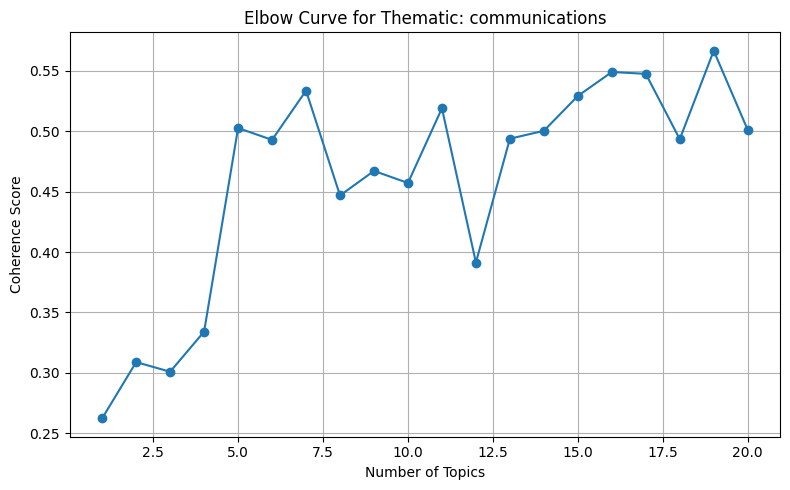


Topics for Thematic: communications (Optimal Topics: 19)
Topic 1: cctv install infrastructure information security best practices access policy fire alarms active directory business process security system
Topic 2: troubleshooting installation commissioning integration technical writing host m technical documentation fiber coaxial systems systems
Topic 3: cloud computing installation system monitoring linux cloud migration troubleshooting infrastructure information technology windows system engineering
Topic 4: certified professional manage citrix azure cloud best practices access policy automation microsoft certify azure solution architect system performance scripts
Topic 5: analyzers spectrum simulation software test datum engineers engineers standards industry spectrum analyzer analyzers ads designs test integration
Topic 6: cybersecurity cyber security antivirus collaborate deployment windows communication network integrate security security document technical system designer
Topi

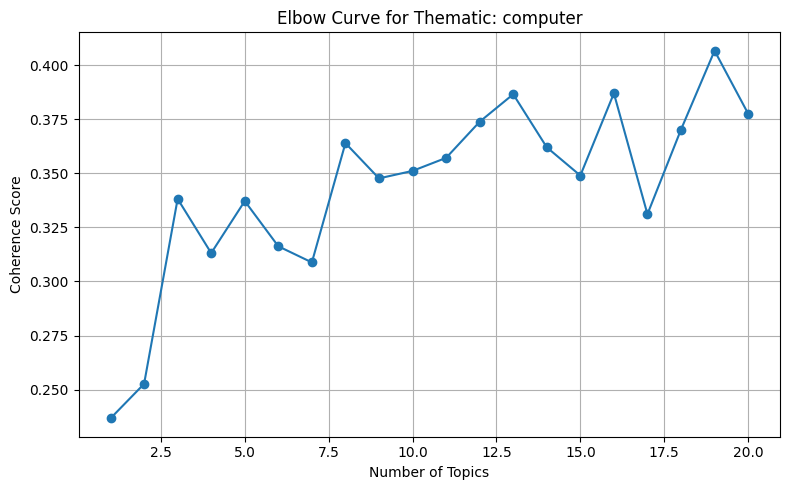


Topics for Thematic: computer (Optimal Topics: 19)
Topic 1: multimedia best practices metadata data management computer science data engineering etl data models device driver tools processes
Topic 2: infrastructure computer science professional python collaborate software development ansible git scripting languages solutions microsoft
Topic 3: python code review unit testing collaborate computer science etl java software development version control c
Topic 4: computer science kubernetes electrical sustainability collaborate data systems software design troubleshooting distributed systems experience design
Topic 5: system systems cloud platforms communication skills computer science react basic skill level applications developing applications information technology managing windows
Topic 6: java git scalable script python teams integrate programming languages system platform systems platforms css
Topic 7: computer science mulesoft desktop support phone system troubleshooting software e

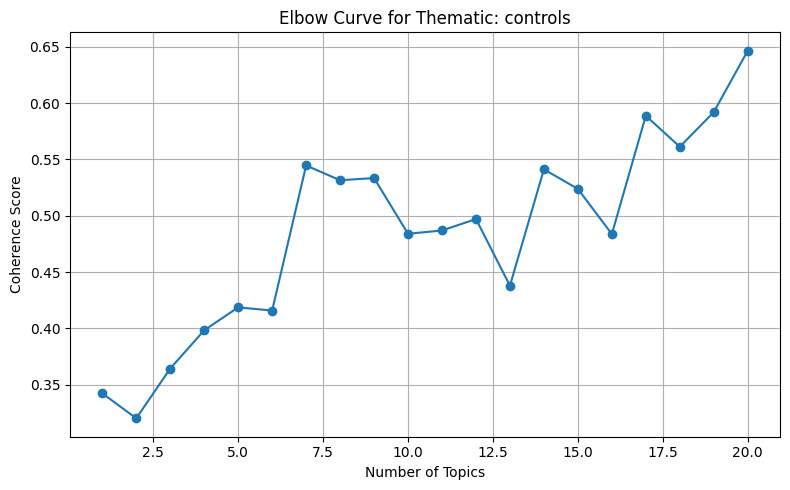


Topics for Thematic: controls (Optimal Topics: 20)
Topic 1: project management coordinate construction project manager leadership planning communicate plans schedule infrastructure
Topic 2: electrical engineering collaborate control system industry related technical support scada power systems planning electrical renewable energy
Topic 3: communication skills electrical cad software organizational skill development test schedule programming languages ladder logic software development electrical engineering
Topic 4: fault audio video video conferencing system operation digital signage digital sound processors digital analogue  fault finding programming dsp audio video signals
Topic 5: plc control engineer electrical electrical wiring wiring diagram c process control instruments control engineering design configuration
Topic 6: operation consulting activities support managers engineers integrate support modbus automation systems autocad documents project ethernet
Topic 7: adas system el

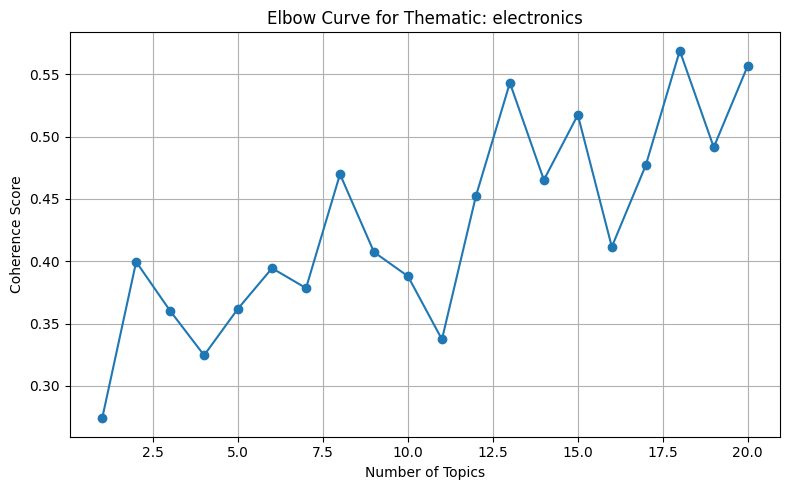


Topics for Thematic: electronics (Optimal Topics: 18)
Topic 1: electrical systems integrate maintenance automation programming planning power system execute domo support low voltage
Topic 2: electronics pcb layout driven design electronics engineer validation design simulation electronics design review design design experience experience design
Topic 3: install computer system telephone systems computer hardware software requirements information technology software updates technical support computing system wireless systems
Topic 4: construction installation mechanical designs integrated water treatment plans quality control automation v systems project management
Topic 5: esd photonics micro architecture health care verification methodologies delivery network program managers timelines integration control system
Topic 6: electrical systems integrate maintenance planning power system automation networking software infrastructure interpersonal communication microsoft office power distr

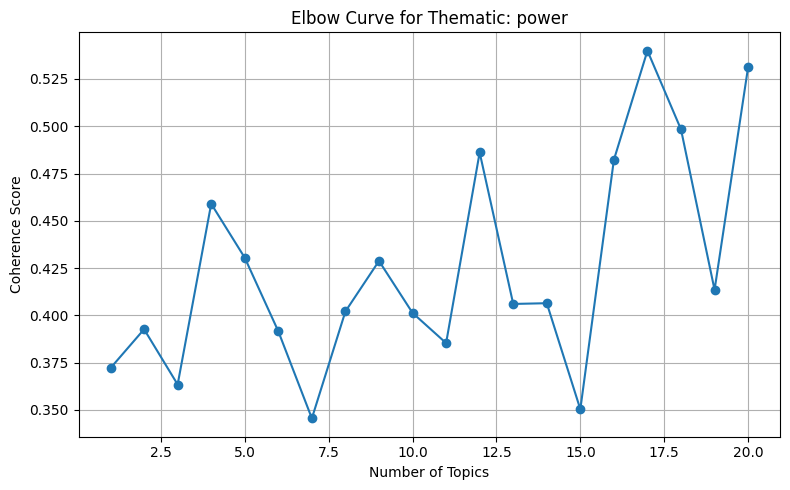


Topics for Thematic: power (Optimal Topics: 17)
Topic 1: coordination electrical engineering plan calculations professional engineer license power design services support budget consultants
Topic 2: electrical electrical engineering electrical design visual track installation troubleshooting electrical technology electrical system revit
Topic 3: power system electrical engineering electrical calculations wastewater treatment investigative ieee control center color nfpa
Topic 4: cse electrical troubleshooting electronic component design verification infrastructure test equipment electronic circuit operation construction
Topic 5: stability analysis planning system industry standards coordination control systems systems engineering reliability budgets planning perform review
Topic 6: drawings revit electrical engineering construction industry standards systems projects autocad electrical design structural engineers writing
Topic 7: construction electrical engineering drawings engineering

In [6]:
# Initialize lists to store data for the combined plot
thematic_names = []
all_topic_nums = []
all_coherence_scores = []
optimal_topics_list = []

for thematic, group in df.groupby('Thematic'):
    print(f"\nPerforming topic modeling for Thematic: {thematic}")
    documents = group["cleaned_description"].tolist()
    
    if not documents or all(len(doc) == 0 for doc in documents):
        print(f"Skipping thematic '{thematic}' because it contains no valid documents.")
        continue

    try:
        dictionary = corpora.Dictionary(documents)
        dictionary.filter_extremes(no_below=1, no_above=0.95)
        corpus = [dictionary.doc2bow(doc) for doc in documents]
        
        # Get coherence scores (from your original code)
        optimal_num_topics, topic_nums, coherence_scores = find_optimal_topics(documents, dictionary, corpus)
        
        # Store data for the combined plot
        thematic_names.append(thematic)
        all_topic_nums.append(topic_nums)
        all_coherence_scores.append(coherence_scores)
        optimal_topics_list.append(optimal_num_topics)
        
        # Plot the elbow curve (Coherence Score vs Number of Topics)
        plt.figure(figsize=(8, 5))
        plt.plot(topic_nums, coherence_scores, marker='o')
        plt.xlabel('Number of Topics')
        plt.ylabel('Coherence Score')
        plt.title(f'Elbow Curve for Thematic: {thematic}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Perform final LDA with optimal number of topics
        lda_model, corpus, dictionary = perform_topic_modeling(documents, num_topics=optimal_num_topics)
        
        # Display topics
        print(f"\nTopics for Thematic: {thematic} (Optimal Topics: {optimal_num_topics})")
        for topic_idx in range(lda_model.num_topics):
            top_words = [dictionary[word_id] for word_id, _ in lda_model.get_topic_terms(topic_idx, topn=10)]
            print(f"Topic {topic_idx + 1}:", " ".join(top_words))

    except ValueError as e:
        print(f"Error processing thematic '{thematic}': {e}")

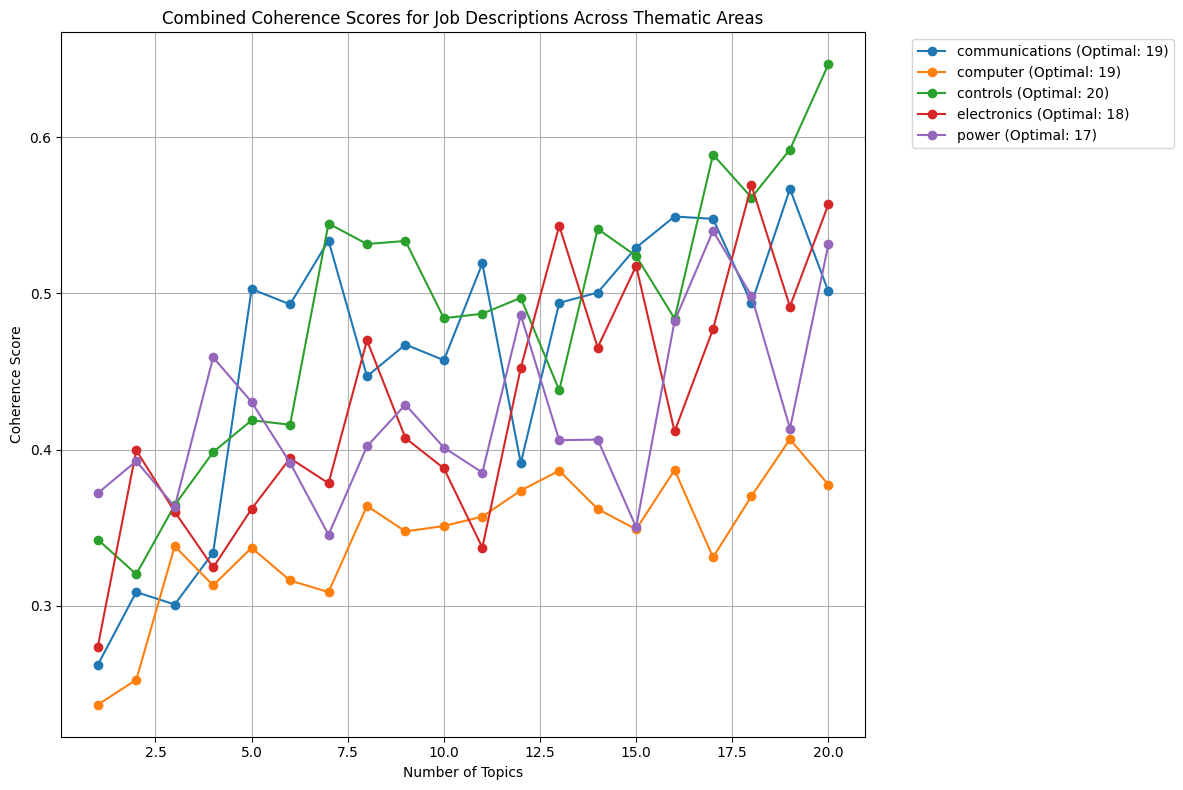

In [10]:
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors  # Different colors for each line

for i in range(len(thematic_names)):
    plt.plot(
        all_topic_nums[i],
        all_coherence_scores[i],
        marker='o',
        color=colors[i % len(colors)],
        label=f"{thematic_names[i]} (Optimal: {optimal_topics_list[i]})"
    )

plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Combined Coherence Scores for Job Descriptions Across Thematic Areas')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()
plt.show()

In [8]:
# Function to find the optimal number of topics and return scores for plotting
def find_optimal_topics(documents, dictionary, corpus, min_topics=1, max_topics=45, step=5):
    coherence_scores = []
    topic_nums = list(range(min_topics, max_topics + 1, step))  # Increase in steps of 5
    
    for num_topics in topic_nums:
        coherence_score = calculate_coherence_score(documents, dictionary, corpus, num_topics)
        coherence_scores.append(coherence_score)
        print(f"Coherence score for {num_topics} topics: {coherence_score:.4f}")
    
    optimal_num_topics = topic_nums[np.argmax(coherence_scores)]
    print(f"Optimal number of topics: {optimal_num_topics}")
    return optimal_num_topics, topic_nums, coherence_scores



Performing topic modeling for Thematic: communications
Coherence score for 1 topics: 0.2622
Coherence score for 6 topics: 0.4929
Coherence score for 11 topics: 0.5191
Coherence score for 16 topics: 0.5492
Coherence score for 21 topics: 0.5211
Coherence score for 26 topics: 0.5835
Coherence score for 31 topics: 0.6370
Coherence score for 36 topics: 0.6500
Coherence score for 41 topics: 0.5633
Optimal number of topics: 36


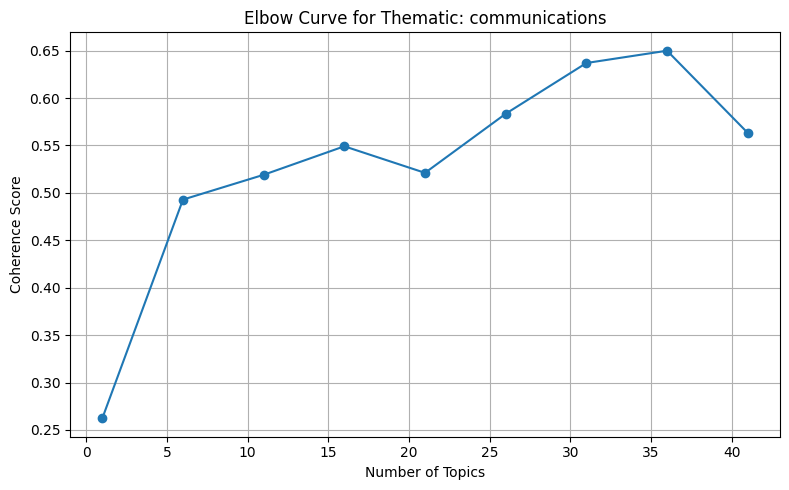


Topics for Thematic: communications (Optimal Topics: 36)
Topic 1: operations alignment business ansible handle system puppet automation infrastructure linux systems system engineering windows servers
Topic 2: gis engineering drawing construction network design layout design infrastructure communication system industry standards cms project managers
Topic 3: infrastructure installation install cctv audio video mechanical engineering electrical wiring lighting security acoustic cem
Topic 4: cloud platforms system systems cisco plan best practices systems administrator collaboratively information technology computer science network protocol
Topic 5: infrastructure virtual server windows server installation managing window server system network system systems veeam server management
Topic 6: network security nac troubleshooting network monitoring ospf span tree protocol networking security infrastructure mitigate managing networking
Topic 7: line communication power system distribution sy

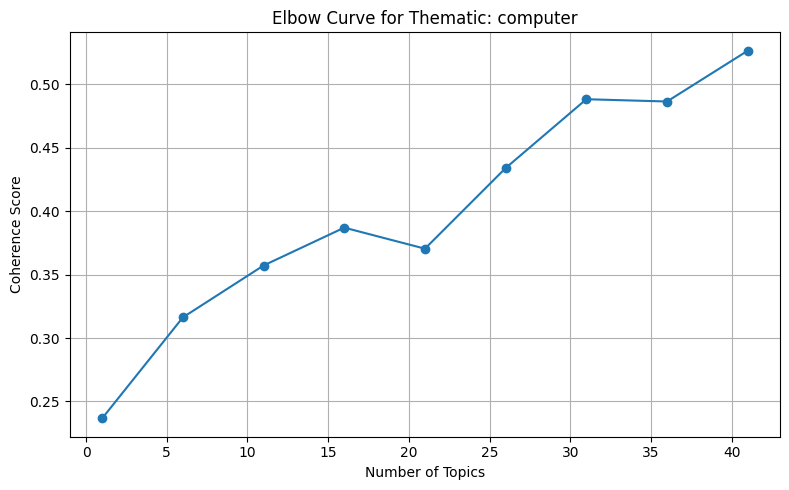


Topics for Thematic: computer (Optimal Topics: 41)
Topic 1: best practices metadata data management collaboration data engineering data models etl tools processes innovation development systems
Topic 2: software development computer science swift python version control english cloud computing software engineering access management continuous integration
Topic 3: automation quality assurance mobile applications driven development massive collaborative api health care backend rest api
Topic 4: sustainability computer science data systems collaborate java data visualization python analysis support engineering technologies communicate
Topic 5: data quality data transformation data processing data pipeline data structured data models data engineering data data structures relationships analytics
Topic 6: linux firmware presentation software development computer science data center integrations product development virtualization debug
Topic 7: xen citrix support services desktop support trou

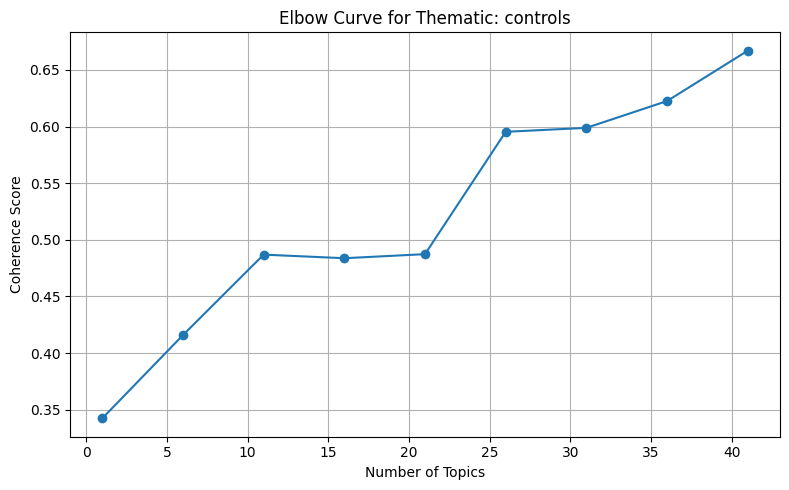


Topics for Thematic: controls (Optimal Topics: 41)
Topic 1: coordinate plans schedule construction communicate engineering process legislation french heavy industrial investigations
Topic 2: design software build automation hvac control engineering industry engineering health benefits microsoft visio building automation benefits employees business operation
Topic 3: oil gas natural sciences resource constraint project manager process engineering planning execution service supporting need needed leadership manager accountable
Topic 4: fault audio video video conferencing system operation digital signage faults qsys iptv system status digital analogue
Topic 5: instrumentation reading license act communication engineering maintenance safe working environment work environment health safety mechanical instrumentation
Topic 6: construction automation systems operation modbus consulting activities support managers engineers integrate support ethernet documents project
Topic 7: electrical ins

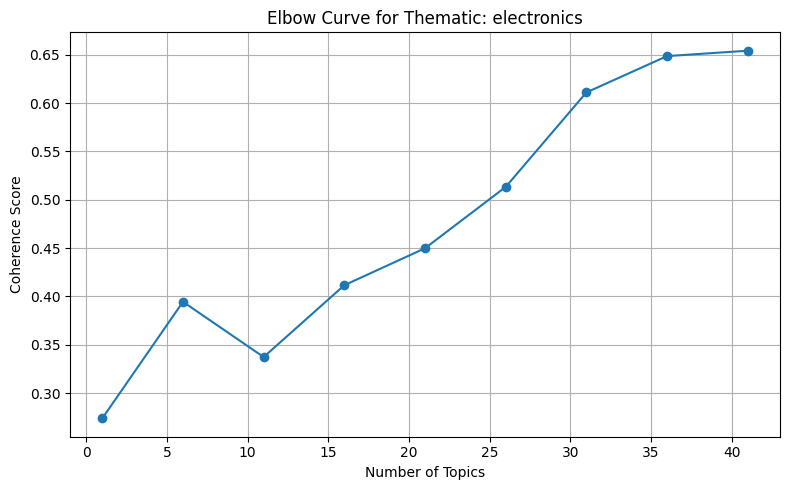


Topics for Thematic: electronics (Optimal Topics: 41)
Topic 1: embedded electric vehicle generate reports engineering design emulation innovations digital asset digital signal integration systems digital signal processor
Topic 2: deterrent safe simulation integration spice life cycle development products designing building electronic component technical writing
Topic 3: embedded electric vehicle generate reports engineering design emulation innovations digital asset digital signal integration systems digital signal processor
Topic 4: construction installation quality control project management plans mechanical designs integrated tailings systems process water treatment
Topic 5: systems integrate maintenance electrical automation power system planning software development industrial systems team orient preventive maintenance control system
Topic 6: embedded electric vehicle generate reports engineering design emulation innovations digital asset digital signal integration systems digita

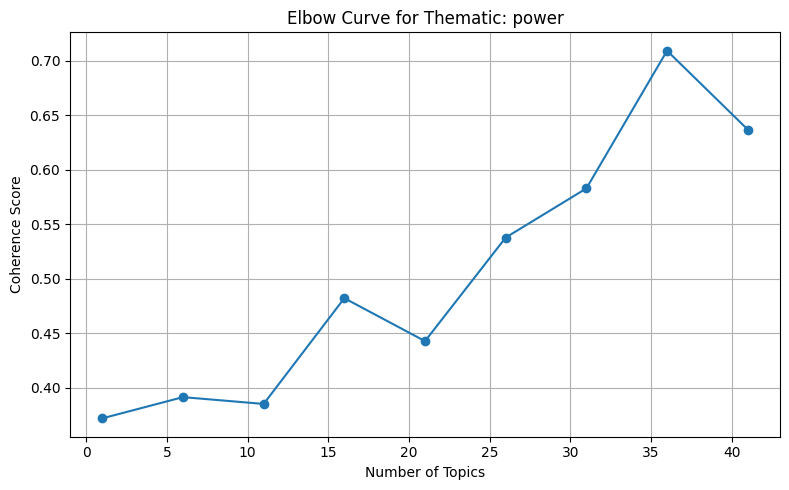


Topics for Thematic: power (Optimal Topics: 36)
Topic 1: coordination calculations ieee license services support power design budget electrical engineering consultants plan
Topic 2: electrical building code electrical engineering distribution systems leadership time management electrical system schedules team effective line diagrams
Topic 3: electronics electronic design electronics projects electronic system electronics engineer renewable energy system requirement electronics technology system requirement specification electronic hardware
Topic 4: system design control systems electrical engineering systems technologies curiosity electrical electric machine revit skm communicate
Topic 5: control systems systems engineering electrical engineering electrical automation senior engineers collaborate scada consultants process control
Topic 6: drawings autocad revit engineers project electrical design structural engineers construction systems projects electrical engineering investigations


In [9]:
# Group by Thematic and process each group
for thematic, group in df.groupby('Thematic'):
    print(f"\nPerforming topic modeling for Thematic: {thematic}")
    documents = group["cleaned_description"].tolist()
    
    if not documents or all(len(doc) == 0 for doc in documents):
        print(f"Skipping thematic '{thematic}' because it contains no valid documents.")
        continue

    try:
        dictionary = corpora.Dictionary(documents)
        dictionary.filter_extremes(no_below= 1, no_above=0.95)
        corpus = [dictionary.doc2bow(doc) for doc in documents]
        
        # Find the optimal number of topics and get scores for plotting
        optimal_num_topics, topic_nums, coherence_scores = find_optimal_topics(documents, dictionary, corpus)
        
        # Plot the elbow curve (Coherence Score vs Number of Topics)
        plt.figure(figsize=(8, 5))
        plt.plot(topic_nums, coherence_scores, marker='o')
        plt.xlabel('Number of Topics')
        plt.ylabel('Coherence Score')
        plt.title(f'Elbow Curve for Thematic: {thematic}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Perform final LDA with optimal number of topics
        lda_model, corpus, dictionary = perform_topic_modeling(documents, num_topics=optimal_num_topics)
        
        # Display topics
        print(f"\nTopics for Thematic: {thematic} (Optimal Topics: {optimal_num_topics})")
        for topic_idx in range(lda_model.num_topics):
            top_words = [dictionary[word_id] for word_id, _ in lda_model.get_topic_terms(topic_idx, topn=10)]
            print(f"Topic {topic_idx + 1}:", " ".join(top_words))

    except ValueError as e:
        print(f"Error processing thematic '{thematic}': {e}")